In [25]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

In [26]:
def impute_median(series):
    "This function fills in the missing data using the median"
    return series.fillna(series.median())


In [27]:
# finding the best predictors, using best subset selection
import itertools

def best_subset(data, y, predictors, k):
    if k == 0:
        predictors_k_best = set()
        model_k_best = smf.ols(y + ' ~ 1', data=df2).fit()
    else:
        aic_k_best = 1e+8
        for predictor_set in itertools.combinations(predictors, k):
            formula_k = y + ' ~ ' + ' + '.join(predictor_set)
            model_k = smf.ols(formula_k, data=df2).fit()
            if model_k.aic <= aic_k_best:
                aic_k_best = model_k.aic
                model_k_best = model_k
                predictors_k_best = predictor_set
    return model_k_best, predictors_k_best

In [28]:
df= pd.read_csv('AB_NYC_2019.csv')
#read data from newyork airbnb

In [29]:
df.head()
#show top of the data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
df = df.sort_values(by=["price"], ascending=False)
df['rank']=tuple(zip(df.price))
df['rank']=df.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()
#sort and rank the data according to price from highest to lowest

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rank
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83,0
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,0


In [31]:
df.drop(["rank"],axis=1,inplace=True)
#remove the rank column

In [32]:
# Get names of indexes for which column minimum_nights has value more than 30
indexNames = df[ df['minimum_nights'] >= 31 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [33]:
# Get names of indexes for which column price is zero
indexPrice = df[ df['price'] == 0 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexPrice , inplace=True)

In [34]:
df.reset_index(inplace=True,drop=True)
df.head()
#reset the index headers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
1,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
2,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
3,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
4,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48137 entries, 0 to 48136
Data columns (total 16 columns):
id                                48137 non-null int64
name                              48122 non-null object
host_id                           48137 non-null int64
host_name                         48116 non-null object
neighbourhood_group               48137 non-null object
neighbourhood                     48137 non-null object
latitude                          48137 non-null float64
longitude                         48137 non-null float64
room_type                         48137 non-null object
price                             48137 non-null int64
minimum_nights                    48137 non-null int64
number_of_reviews                 48137 non-null int64
last_review                       38394 non-null object
reviews_per_month                 38394 non-null float64
calculated_host_listings_count    48137 non-null int64
availability_365                  48137 non-null int64

In [36]:
df.shape

(48137, 16)

In [37]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48132,26496645,Room with a view,110049861,Martin,Brooklyn,Williamsburg,40.70959,-73.95693,Private room,10,1,0,NaN,NaN,1,83
48133,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
48134,18835820,"Quiet, Cozy UES Studio Near the Subway",52777892,Amy,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,2018-10-22,0.39,1,0
48135,25839759,Gigantic Sunny Room in Park Slope-Private Back...,167570251,Rachel,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10,1,14,2018-10-28,1.06,1,4
48136,19415314,"Girls only, cozy room one block from Times Square",47336995,Mario,Manhattan,Hell's Kitchen,40.75812,-73.98935,Shared room,10,1,2,2017-06-24,0.08,1,0


In [38]:
df.drop(['id','host_id','host_name','last_review'],axis=1,inplace=True)
#remove the id, host_id, host_name and the last review

In [39]:
df.isnull().sum()
#detect the missing values in the data

name                                15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9743
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [40]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)
#fill in the missing reviews_per_month using the median

In [41]:
df.isnull().sum()
#check for the any missing data

name                              15
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [42]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [43]:
df.nunique()
#number of unique values

name                              47161
neighbourhood_group                   5
neighbourhood                       221
latitude                          18941
longitude                         14662
room_type                             3
price                               660
minimum_nights                       30
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

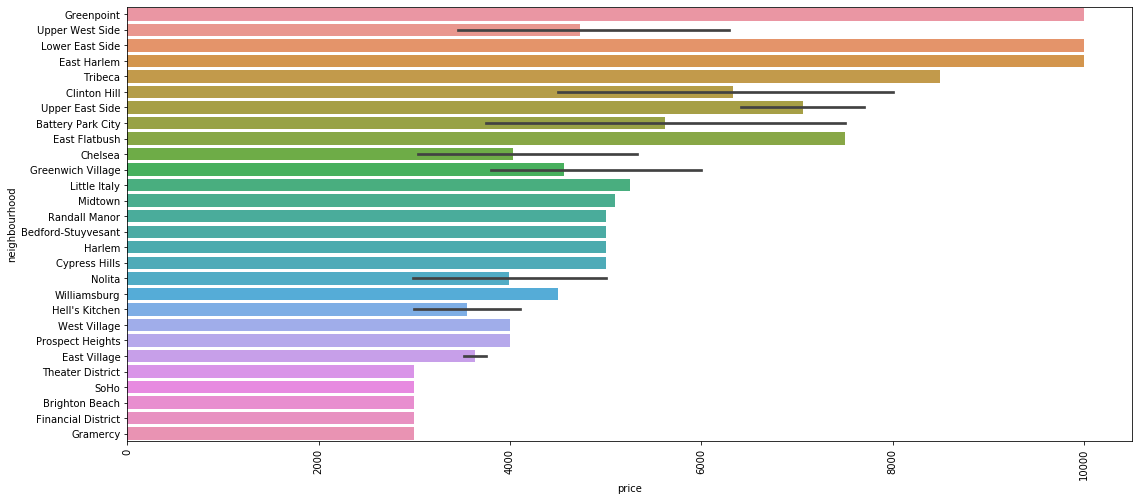

In [44]:
#neighbourhood - price
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x=df.price[:50], y=df.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


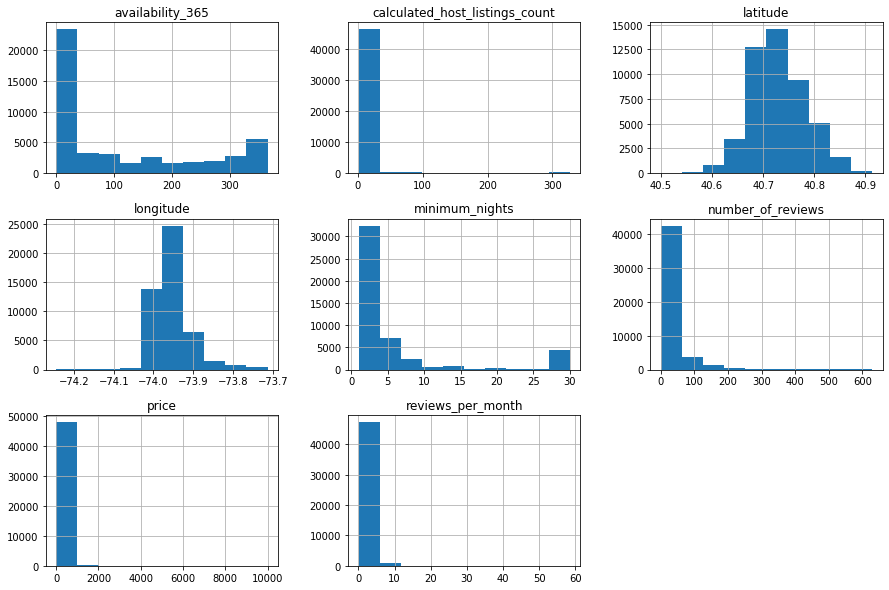

In [45]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

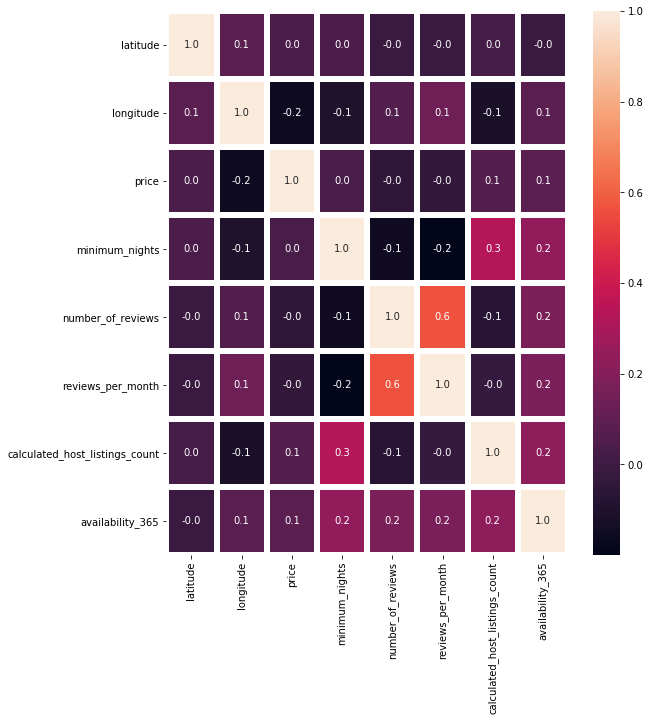

In [46]:
f,ax=plt.subplots(figsize=(9,10))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

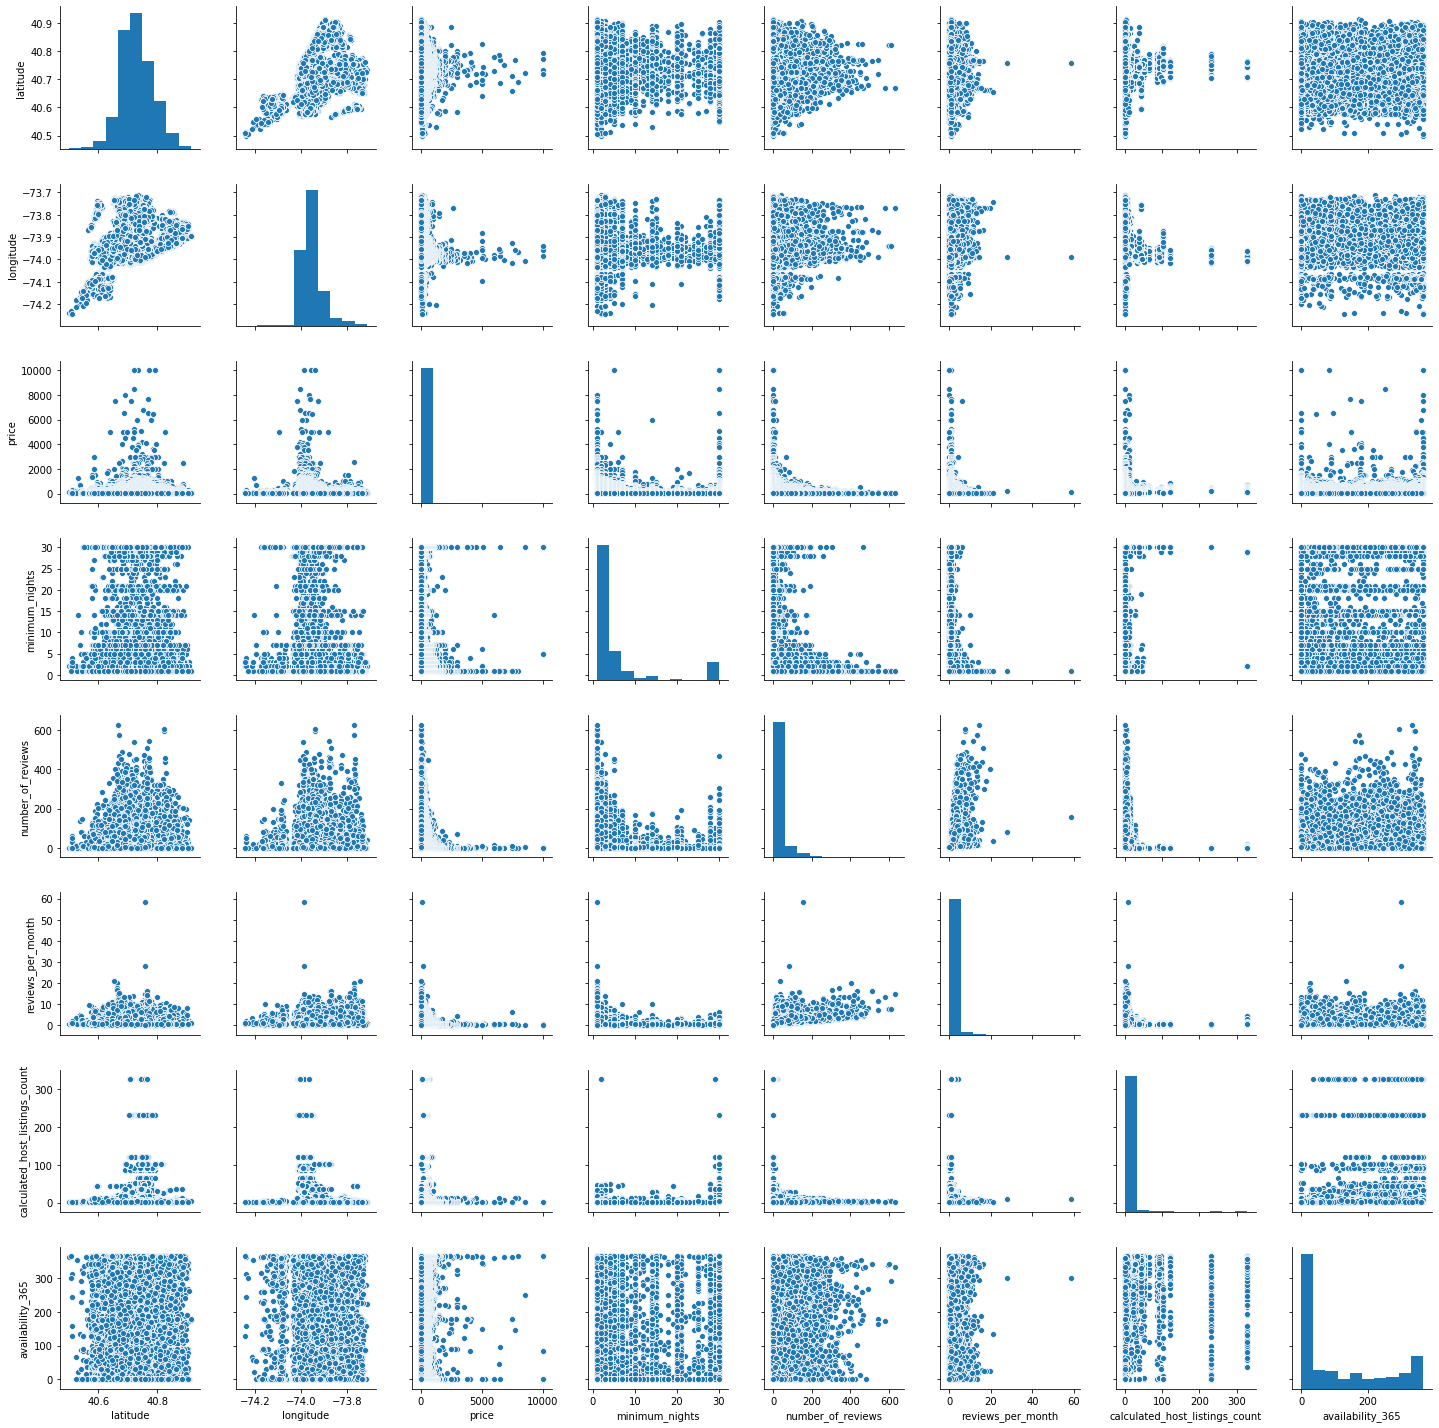

In [47]:
sns.pairplot(df)
plt.show()

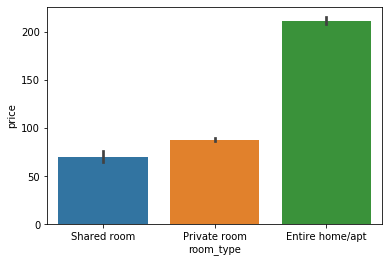

In [48]:
#room_type - price
result = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

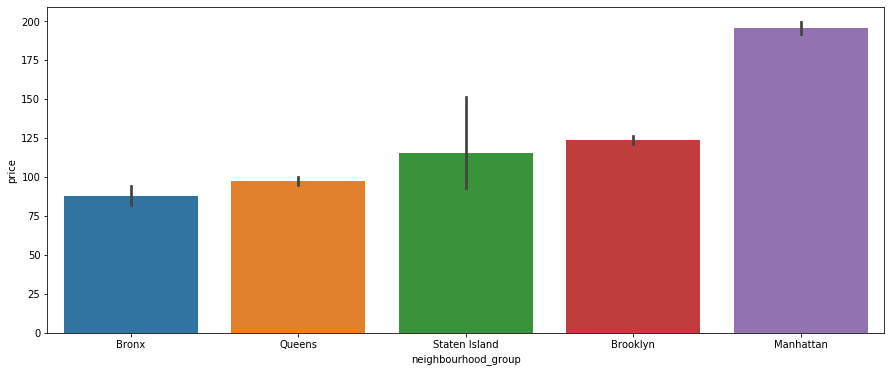

In [49]:
#neighbourhood_group - price
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

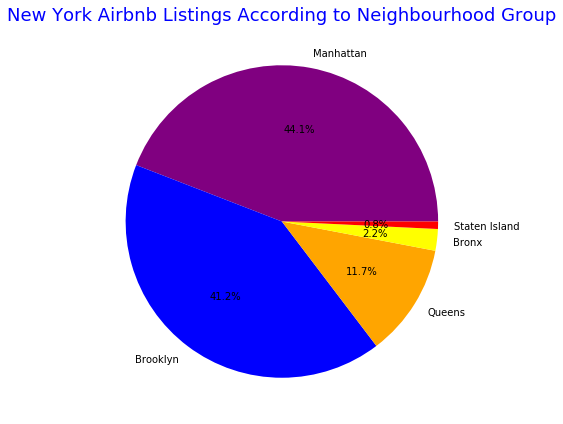

In [50]:
labels = df.neighbourhood_group.value_counts().index
colors = ['purple','blue','orange','yellow','red']
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('New York Airbnb Listings According to Neighbourhood Group',color = 'blue',fontsize = 18)
plt.show()

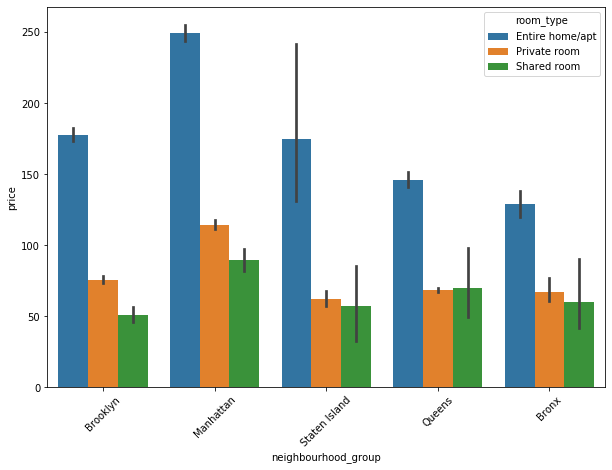

In [51]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

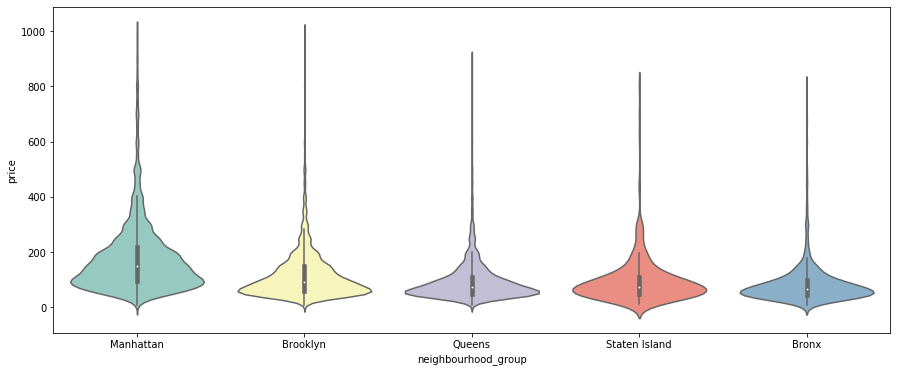

In [52]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="neighbourhood_group", y="price",
                    data=df[df.price < 1000],
                    scale="width", palette="Set3")

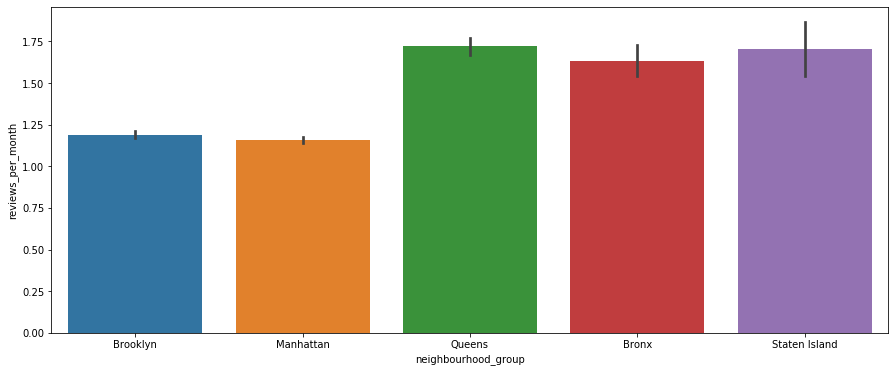

In [53]:
#neighbourhood_group - reviews_per_month
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

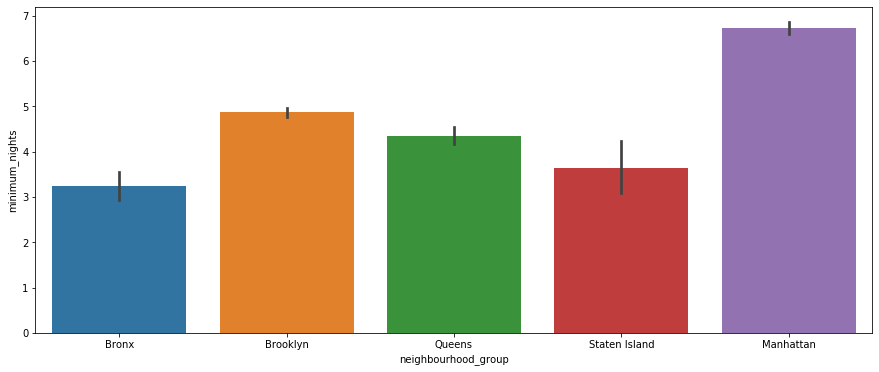

In [54]:
#neighbourhood_group - minimum_nights
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

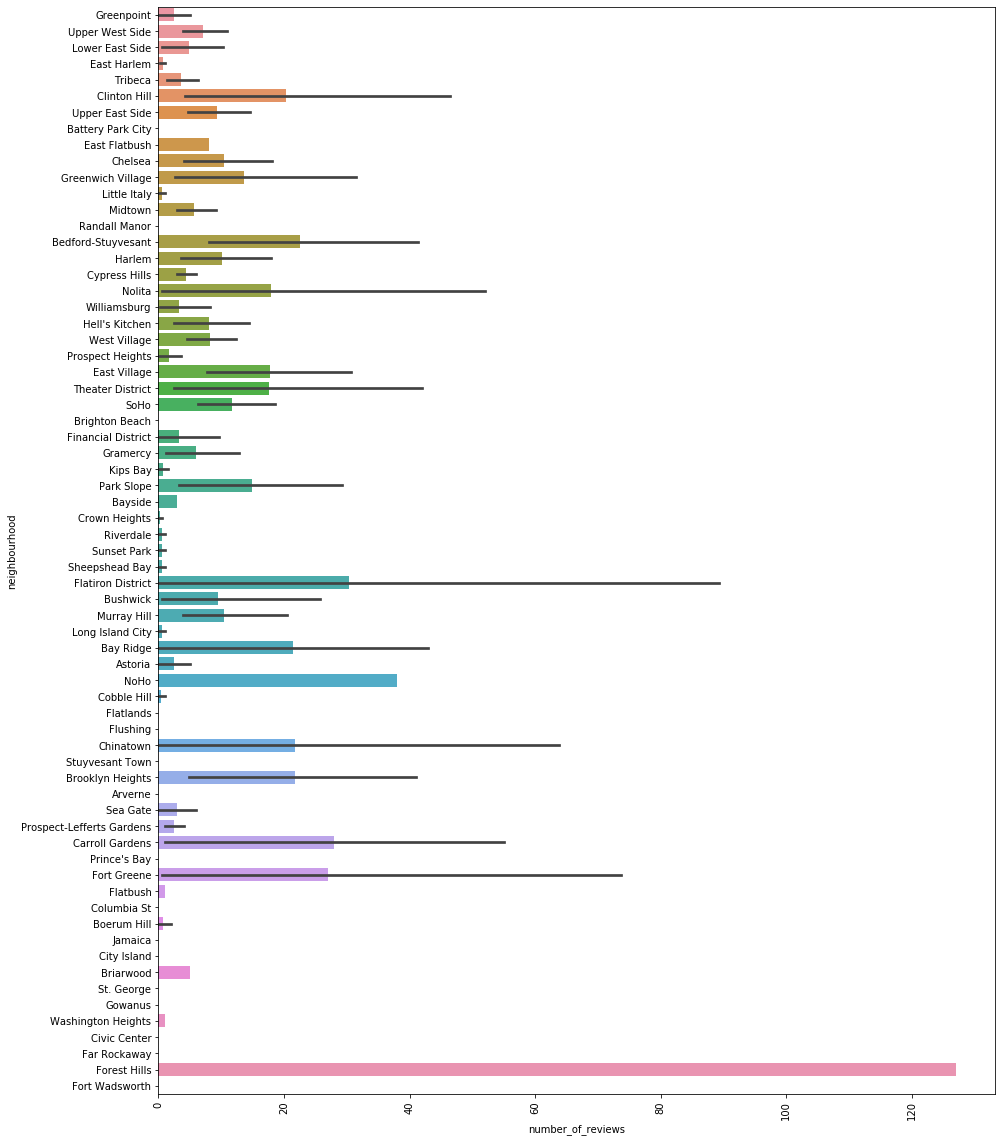

In [55]:
#neighbourhood - number_of_reviews
plt.figure(figsize=(15,20))
#result = df.groupby(["neighbourhood"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x=df.number_of_reviews[:500], y=df.neighbourhood[:500]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

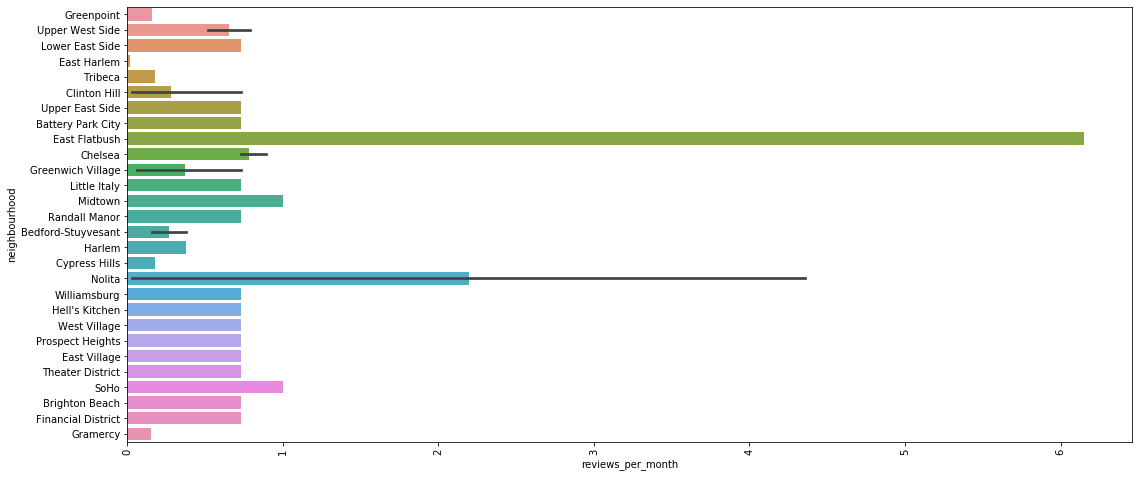

In [56]:
#neighbourhood - reviews_per_month
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x=df.reviews_per_month[:50], y=df.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

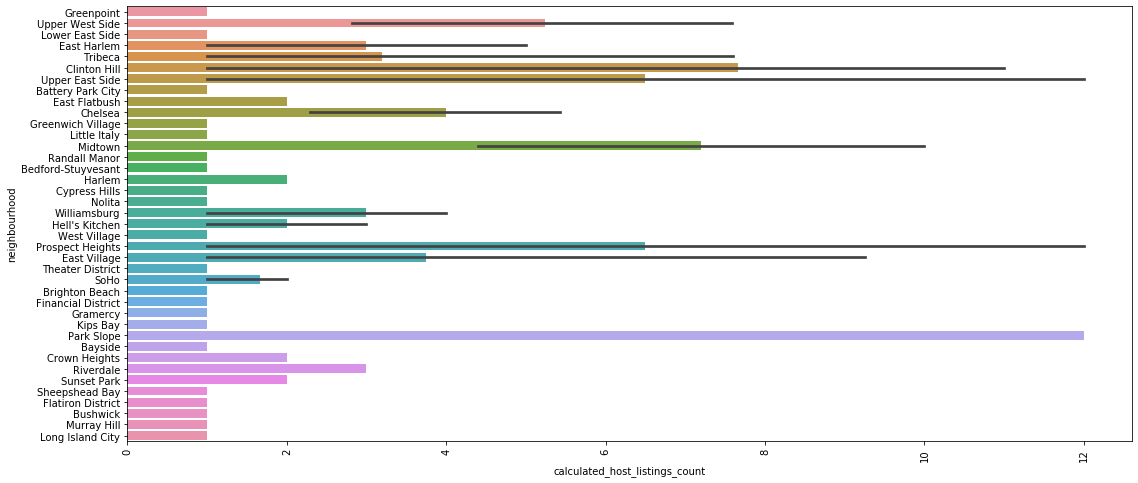

In [57]:
#neighbourhood - calculated_host_listings_count
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x=df.calculated_host_listings_count[:100], y=df.neighbourhood[:100]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

In [58]:
df_rich_hosts=pd.DataFrame(df.iloc[:,0:2])
df_rich_hosts['latitude']=df.iloc[:,3]
df_rich_hosts['longitude']=df.iloc[:,4]
df_rich_hosts['room_type']=df.iloc[:,5]
df_rich_hosts['price']=df.iloc[:,6]
df_rich_hosts.head()

,name,neighbourhood_group,latitude,longitude,room_type,price
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,40.73260,-73.95739,Entire home/apt,10000
1,1-BR Lincoln Center,Manhattan,40.77213,-73.98665,Entire home/apt,10000
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,40.71980,-73.98566,Entire home/apt,9999
3,Spanish Harlem Apt,Manhattan,40.79264,-73.93898,Entire home/apt,9999
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,40.72197,-74.00633,Entire home/apt,8500


In [59]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [60]:
df[df.room_type=="Private room"].describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,22093.0,40.729228,0.058237,40.49979,40.68929,40.71777,40.76469,40.91306
longitude,22093.0,-73.942811,0.048112,-74.24285,-73.96970,-73.94806,-73.92514,-73.71299
price,22093.0,88.097090,121.776623,10.00000,50.00000,70.00000,95.00000,7500.00000
minimum_nights,22093.0,4.386865,6.782325,1.00000,1.00000,2.00000,4.00000,30.00000
number_of_reviews,22093.0,24.274159,47.452002,0.00000,1.00000,5.00000,25.00000,629.00000
reviews_per_month,22093.0,1.303021,1.645535,0.01000,0.30000,0.73000,1.67000,58.50000
calculated_host_listings_count,22093.0,3.237270,10.265056,1.00000,1.00000,1.00000,2.00000,327.00000
availability_365,22093.0,110.656950,131.907908,0.00000,0.00000,44.00000,212.00000,365.00000


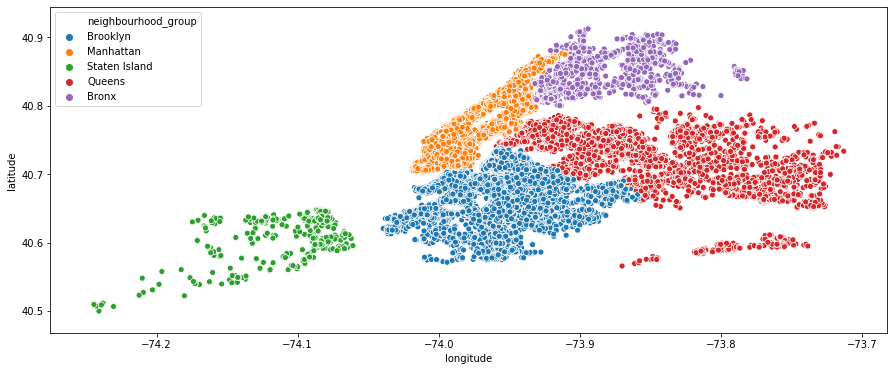

In [61]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.neighbourhood_group)
plt.ioff()

#how do i rotate this 90 degrees?

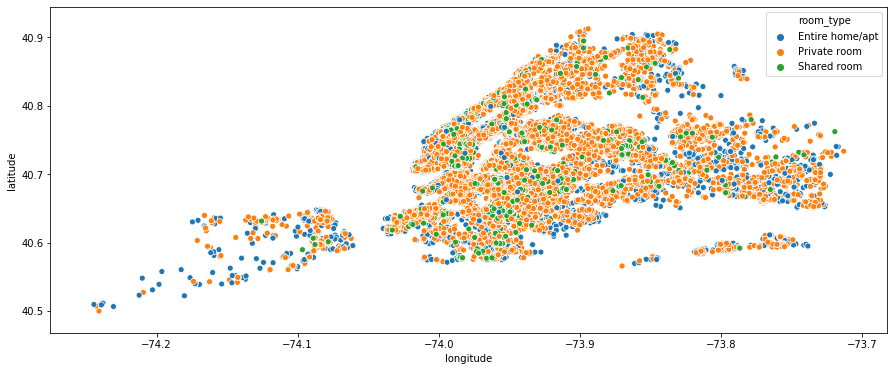

In [62]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.room_type)
plt.ioff()

In [63]:
print(df.latitude.max())
print(df.latitude.min())
print(df.longitude.max())
print(df.longitude.min())

40.913059999999994
40.499790000000004
-73.71299
-74.24441999999999


In [64]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.67,-73.8],zoom_start=10)
HeatMap(df_rich_hosts[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [40]:
qn_price = 175
meu_price = df['price'].mean()
sima_price = df['price'].std()
var_price = df['price'].var()
print(meu_price)
print(var_price)
print(sima_price)

151.41880466169474
51156.800999206505
226.17869262865258


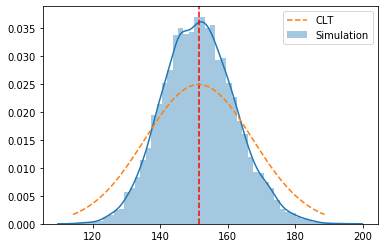

In [41]:
#to figure out the sampling distribution of sample mean, given the null hypothesis is correct

repeat = 10000
sam_size = 200
simu_sample = np.random.exponential(meu_price, size = (repeat, sam_size))
simu_sample_mean = np.mean(simu_sample, axis = 1) 

xx = np.linspace(sps.norm.ppf(0.01, loc = meu_price, scale = (var_price/sam_size)**0.5), 
                 sps.norm.ppf(0.99, loc = meu_price, scale = (var_price/sam_size)**0.5), 10000)

sns.distplot(simu_sample_mean, label = 'Simulation')
plt.axvline(x = meu_price, ls = '--', color = "r")
plt.plot(xx, sps.norm.pdf(xx, loc = meu_price, scale = (var_price/sam_size)**0.5), ls = '--', label = 'CLT')
plt.legend(loc = "best")
plt.show()

The lower endpoint of the rejection region by simulation is 170.00196310212624
The lower endpoint of the rejection region by CLT approximation is 177.7253578448718


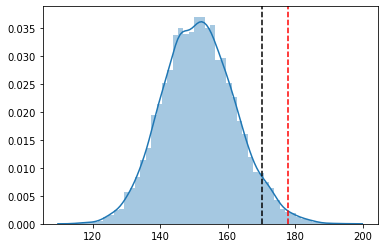

In [42]:
print("The lower endpoint of the rejection region by simulation is", np.percentile(simu_sample_mean, 95)) 
print("The lower endpoint of the rejection region by CLT approximation is", 
      sps.norm.ppf(0.95, loc = meu_price, scale = (var_price/sam_size)**0.5)) 

sns.distplot(simu_sample_mean)
plt.axvline(x = np.percentile(simu_sample_mean, 95), ls = '--', color = "k")
plt.axvline(x = sps.norm.ppf(0.95, loc = meu_price, scale = (var_price/sam_size)**0.5), ls = '--', color = "r")
plt.show()

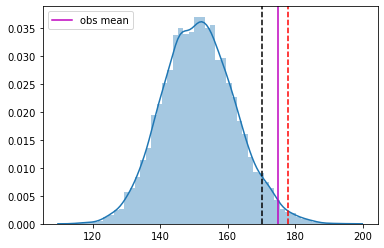

In [43]:
sns.distplot(simu_sample_mean)
plt.axvline(x = np.percentile(simu_sample_mean, 95), ls = '--', color = "k")
plt.axvline(x = sps.norm.ppf(0.95, loc = meu_price, scale = (var_price/sam_size)**0.5), ls = '--', color = "r")
plt.axvline(x = qn_price, color = "m", label = "obs mean")
plt.legend(loc = "best")
plt.show()

In [44]:
CLT_p_value = 1- sps.norm.cdf(qn_price, loc = meu_price, scale = (var_price/sam_size)**0.5)
Simu_p_value = (np.sum(simu_sample_mean > qn_price) / len(simu_sample_mean))
print("p-value based on CLT is", CLT_p_value)
print("p-value based on simulation is", Simu_p_value)

p-value based on CLT is 0.07018065802915785
p-value based on simulation is 0.018


not really sure what does this p-value mean for our null hypothesis...

MULTIPLE REGRESSION



for those that might be related, we can multiply them together?

5 C 2 = 10

Chuck into variable into excel X1 x X2 / X1 X X3
Then import back into python.

In [83]:
df2= pd.read_csv('AB_NYC_2019 (editted regression).csv')
#read data from newyork airbnb

In [84]:
df2 = df2.sort_values(by=["price"], ascending=False)
df2['rank']=tuple(zip(df2.price))
df2['rank']=df2.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values

In [85]:
df2.drop(["rank"],axis=1,inplace=True)
#remove the rank column

In [86]:
# Get names of indexes for which column minimum_nights has value more than 30
indexNames = df2[ df2['minimum_nights'] >= 31 ].index
 
# Delete these row indexes from dataFrame
df2.drop(indexNames , inplace=True)

In [87]:
# Get names of indexes for which column price is zero
indexPrice = df2[ df2['price'] == 0 ].index
 
# Delete these row indexes from dataFrame
df2.drop(indexPrice , inplace=True)

In [88]:
df2.reset_index(inplace=True,drop=True)
df2.head()
#reset the index headers

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,mxn,mxr,mxc,mxa,nxr,nxc,nxa,rxc,rxa,cxa
0,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,...,25,0.8,5,0,0.80,5,0,0.16,0.00,0
1,22436899,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,...,0,0.0,30,2490,0.00,0,0,0.00,0.00,83
2,31340283,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,...,0,0.0,30,10950,0.00,0,0,0.00,0.00,365
3,4737930,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,...,5,0.1,5,0,0.02,1,0,0.02,0.00,0
4,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,...,60,5.4,30,7530,0.36,2,502,0.18,45.18,251


In [89]:
df2.drop(['id'],axis=1,inplace=True)
#remove the id, host_id, host_name and the last reviewx

In [90]:
df2.isnull().sum()
#check for the any missing data

name                                15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9743
calculated_host_listings_count       0
availability_365                     0
mxn                                  0
mxr                                  0
mxc                                  0
mxa                                  0
nxr                                  0
nxc                                  0
nxa                                  0
rxc                                  0
rxa                                  0
cxa                                  0
dtype: int64

In [91]:
df2.reviews_per_month=df2["reviews_per_month"].transform(impute_median)
#fill in the missing reviews_per_month using the median

In [92]:
df2.isnull().sum()
#check for the any missing data

name                              15
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
mxn                                0
mxr                                0
mxc                                0
mxa                                0
nxr                                0
nxc                                0
nxa                                0
rxc                                0
rxa                                0
cxa                                0
dtype: int64

In [93]:
df2.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,mxn,mxr,mxc,mxa,nxr,nxc,nxa,rxc,rxa,cxa
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,...,25,0.8,5,0,0.80,5,0,0.16,0.00,0
1,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.73,...,0,0.0,30,2490,0.00,0,0,0.00,0.00,83
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.73,...,0,0.0,30,10950,0.00,0,0,0.00,0.00,365
3,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,...,5,0.1,5,0,0.02,1,0,0.02,0.00,0
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,...,60,5.4,30,7530,0.36,2,502,0.18,45.18,251


In [94]:
df2.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'mxn', 'mxr', 'mxc', 'mxa', 'nxr', 'nxc', 'nxa',
       'rxc', 'rxa', 'cxa'],
      dtype='object')

In [95]:
df2.nunique()
#number of unique values

name                              47152
neighbourhood_group                   5
neighbourhood                       221
latitude                          18941
longitude                         14662
room_type                             3
price                               660
minimum_nights                       30
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
mxn                                 855
mxr                                1899
mxc                                 144
mxa                                2094
nxr                                9770
nxc                                 829
nxa                                8044
rxc                                2440
rxa                               14245
cxa                                2783
dtype: int64

In [96]:
model = smf.ols('price ~ mxn + mxr + mxc + mxa + nxr + nxc + nxa + rxc + rxa + cxa',
                data=df2)                                  # Specify the datasets

results = model.fit()                                       # Fit the model
print(results.summary())                                    # Show the report of results

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     37.12
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.42e-73
Time:                        11:27:42   Log-Likelihood:            -3.2908e+05
No. Observations:               48137   AIC:                         6.582e+05
Df Residuals:                   48126   BIC:                         6.583e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    149.8039      1.245    120.278      0.0

Finding the best subset

In [97]:
df2.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'mxn', 'mxr', 'mxc', 'mxa', 'nxr', 'nxc', 'nxa',
       'rxc', 'rxa', 'cxa'],
      dtype='object')

In [98]:
predictors = set(['mxn','mxr','mxc','mxa','nxr','nxc','nxa','rxc','rxa','cxa'])

In [99]:
p = len(predictors)

aic_best = 1e+8
for k in range(0, p+1, 1):
    model_k, predictors_k = best_subset(df2, 'price', predictors, k)
    print(k, model_k.aic, predictors_k)
    if model_k.aic <= aic_best:
        aic_best = model_k.aic
        k_best = k
        model_best = model_k
        predictors_best = predictors_k
print('Best Model: ', k_best, model_best.aic, predictors_best)

0 658540.5662559243 set()
1 658369.9000037428 ('cxa',)
2 658301.3418123133 ('nxr', 'cxa')
3 658238.4486218056 ('rxc', 'mxa', 'nxc')
4 658209.9635160265 ('cxa', 'rxc', 'mxa', 'nxc')
5 658199.8530263702 ('cxa', 'rxc', 'mxr', 'mxa', 'nxc')


KeyboardInterrupt: 

In [65]:
print(model_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     52.52
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           4.04e-75
Time:                        13:33:58   Log-Likelihood:            -3.2909e+05
No. Observations:               48137   AIC:                         6.582e+05
Df Residuals:                   48129   BIC:                         6.583e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    150.0952      1.220    122.983      0.0

Question: Can we use the categorical variables as a dummy variable and incorporate into our multi regression?

In [100]:
df2.loc[(df2['room_type']=='Shared room'), 'd1'] = 1
df2.loc[(df2['room_type']=='Shared room'), 'd2'] = 0
df2.loc[(df2['room_type']=='Entire home/apt'), 'd1'] = 1
df2.loc[(df2['room_type']=='Entire home/apt'), 'd2'] = 1
df2.head(10)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,mxc,mxa,nxr,nxc,nxa,rxc,rxa,cxa,d1,d2
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,...,5,0,0.80,5,0,0.16,0.00,0,1.0,1.0
1,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.73,...,30,2490,0.00,0,0,0.00,0.00,83,1.0,1.0
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.73,...,30,10950,0.00,0,0,0.00,0.00,365,1.0,1.0
3,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,...,5,0,0.02,1,0,0.02,0.00,0,1.0,1.0
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,...,30,7530,0.36,2,502,0.18,45.18,251,1.0,1.0
5,Film Location,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,...,11,365,0.03,11,365,0.33,10.95,4015,1.0,1.0
6,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.73,...,12,146,0.00,0,0,0.00,0.00,1752,1.0,1.0
7,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.73,...,1,364,0.00,0,0,0.00,0.00,364,1.0,1.0
8,Gem of east Flatbush,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,...,2,179,49.20,16,1432,12.30,1100.85,358,NaN,NaN
9,3000 sq ft daylight photo studio,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.73,...,6,364,0.00,0,0,0.00,0.00,2184,1.0,1.0


In [101]:
df2['d1'].fillna(0, inplace=True)
df2['d2'].fillna(0, inplace=True)
df2.head(10)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,mxc,mxa,nxr,nxc,nxa,rxc,rxa,cxa,d1,d2
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,...,5,0,0.80,5,0,0.16,0.00,0,1.0,1.0
1,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.73,...,30,2490,0.00,0,0,0.00,0.00,83,1.0,1.0
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.73,...,30,10950,0.00,0,0,0.00,0.00,365,1.0,1.0
3,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,...,5,0,0.02,1,0,0.02,0.00,0,1.0,1.0
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,...,30,7530,0.36,2,502,0.18,45.18,251,1.0,1.0
5,Film Location,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,...,11,365,0.03,11,365,0.33,10.95,4015,1.0,1.0
6,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.73,...,12,146,0.00,0,0,0.00,0.00,1752,1.0,1.0
7,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.73,...,1,364,0.00,0,0,0.00,0.00,364,1.0,1.0
8,Gem of east Flatbush,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,...,2,179,49.20,16,1432,12.30,1100.85,358,0.0,0.0
9,3000 sq ft daylight photo studio,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.73,...,6,364,0.00,0,0,0.00,0.00,2184,1.0,1.0


In [102]:
df2.isnull().sum()

name                              15
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
mxn                                0
mxr                                0
mxc                                0
mxa                                0
nxr                                0
nxc                                0
nxa                                0
rxc                                0
rxa                                0
cxa                                0
d1                                 0
d2                                 0
dtype: int64

In [103]:
#creating a new colmun with remarks
df2.loc[(df2['d1'] == 0) & (df2['d2'] == 0), 'remarks'] = 'private'
df2.loc[(df2['d1'] == 1) & (df2['d2'] == 0), 'remarks'] = 'shared'
df2.loc[(df2['d1'] == 0) & (df2['d2'] == 1), 'remarks'] = 'entire'
df2.head(100)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,mxa,nxr,nxc,nxa,rxc,rxa,cxa,d1,d2,remarks
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,...,0,0.80,5,0,0.16,0.00,0,1.0,1.0,NaN
1,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.73,...,2490,0.00,0,0,0.00,0.00,83,1.0,1.0,NaN
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.73,...,10950,0.00,0,0,0.00,0.00,365,1.0,1.0,NaN
3,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,...,0,0.02,1,0,0.02,0.00,0,1.0,1.0,NaN
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,...,7530,0.36,2,502,0.18,45.18,251,1.0,1.0,NaN
5,Film Location,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,...,365,0.03,11,365,0.33,10.95,4015,1.0,1.0,NaN
6,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.73,...,146,0.00,0,0,0.00,0.00,1752,1.0,1.0,NaN
7,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.73,...,364,0.00,0,0,0.00,0.00,364,1.0,1.0,NaN
8,Gem of east Flatbush,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,...,179,49.20,16,1432,12.30,1100.85,358,0.0,0.0,private
9,3000 sq ft daylight photo studio,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.73,...,364,0.00,0,0,0.00,0.00,2184,1.0,1.0,NaN


Now we can derive the multi regression with the best subset to determine the effect of the dummy variables on the price of airbnb

In [104]:
model = smf.ols('price ~ nxc+ cxa + nxa + mxa + nxr + mxr + rxc + remarks', data=df2)                                  # Specify the datasets

results = model.fit()                                       # Fit the model
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.01
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.61e-20
Time:                        11:28:49   Log-Likelihood:            -1.4433e+05
No. Observations:               23234   AIC:                         2.887e+05
Df Residuals:                   23225   BIC:                         2.887e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.0908      0.94

if the p value is less than 0.05, is it statistically significant? Yes? need to check

Should we import GDP per capita and compare the effect on price? since the r-squared value are considerably low?

In [67]:
df_gdp = pd.read_csv('GDP.csv')
df_gdp.shape
df_gdp.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [80]:
a_list = df_gdp.index[df_gdp['LOCATION'] == 'USA'].tolist()
print(type(a_list))

<class 'list'>


In [81]:
df_gdp.drop(index=df_gdp.index.difference([i for i in a_list]))

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
2775,USA,GDP,TOT,MLN_USD,A,1970,1.073303e+06,NaN
2776,USA,GDP,TOT,MLN_USD,A,1971,1.164850e+06,NaN
2777,USA,GDP,TOT,MLN_USD,A,1972,1.279110e+06,NaN
2778,USA,GDP,TOT,MLN_USD,A,1973,1.425376e+06,NaN
2779,USA,GDP,TOT,MLN_USD,A,1974,1.545243e+06,NaN
2780,USA,GDP,TOT,MLN_USD,A,1975,1.684904e+06,NaN
2781,USA,GDP,TOT,MLN_USD,A,1976,1.873412e+06,NaN
2782,USA,GDP,TOT,MLN_USD,A,1977,2.081826e+06,NaN
2783,USA,GDP,TOT,MLN_USD,A,1978,2.351599e+06,NaN
2784,USA,GDP,TOT,MLN_USD,A,1979,2.627334e+06,NaN
